In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data
frame = pd.read_csv('rating_final.csv')
cuisine = pd.read_csv('chefmozcuisine.csv')
geodata = pd.read_csv('geoplaces2.csv', encoding='latin-1')

In [3]:
places = geodata[['placeID','name','price']]
places.head()

,placeID,name,price
0,134999,Kiku Cuernavaca,medium
1,132825,puesto de tacos,low
2,135106,El Rincón de San Francisco,medium
3,132667,little pizza Emilio Portes Gil,low
4,132613,carnitas_mata,medium


In [4]:
# Check the first dataset
frame.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [5]:
# Check the next dataset 
cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [6]:
# Calculate the cumilative rating based on the place
rating_count = pd.DataFrame(frame.groupby('placeID')['rating'].count())
rating_sorted = rating_count.sort_values('rating',ascending=False)
most_rated_places= pd.DataFrame(rating_sorted.index.values[:5],index=np.arange(5),columns=['placeID'])
# rating_sorted.head() uncomment this line to see the individual ratings and comment the next line
most_rated_places
place_details = pd.merge(most_rated_places,places,on='placeID')
top_five = place_details.head()
top_five

,placeID,name,price
0,135085,Tortas Locas Hipocampo,medium
1,132825,puesto de tacos,low
2,135032,Cafeteria y Restaurant El Pacifico,medium
3,135052,La Cantina Restaurante,high
4,132834,Gorditas Doa Gloria,low


In [7]:
p_id = top_five['name'].values.tolist()
y = rating_sorted['rating'].values   # Get the rating values
x = np.arange(5)
y_list = y[:5].tolist()     # Convert array to list for plotting

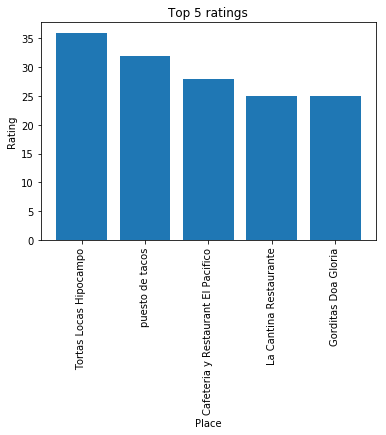

In [8]:
# PLot the top 5 ratings
plt.bar(x,y_list)
plt.xticks(x,p_id)
plt.xticks(rotation=90)
plt.xlabel('Place')
plt.ylabel('Rating')
plt.title('Top 5 ratings')
plt.show()

In [9]:
summary = pd.merge(top_five,cuisine,on='placeID')
summary

,placeID,name,price,Rcuisine
0,135085,Tortas Locas Hipocampo,medium,Fast_Food
1,132825,puesto de tacos,low,Mexican
2,135032,Cafeteria y Restaurant El Pacifico,medium,Cafeteria
3,135032,Cafeteria y Restaurant El Pacifico,medium,Contemporary
4,135052,La Cantina Restaurante,high,Bar
5,135052,La Cantina Restaurante,high,Bar_Pub_Brewery
6,132834,Gorditas Doa Gloria,low,Mexican
